In [9]:
pip install pandas numpy xgboost scikit-learn

Note: you may need to restart the kernel to use updated packages.


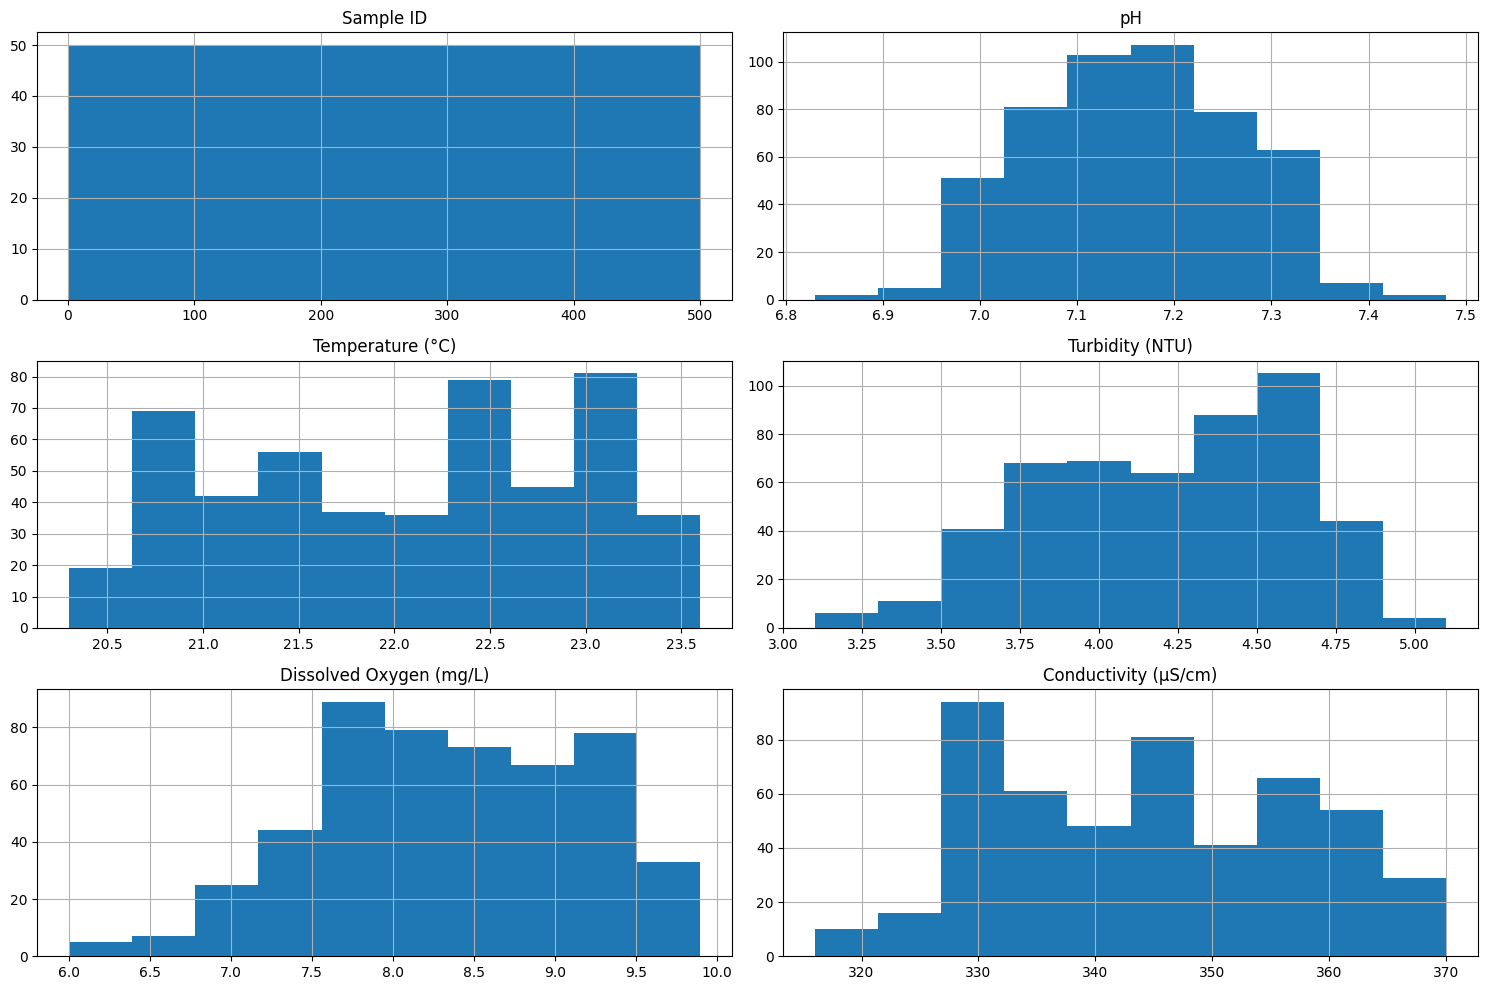

In [46]:

import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
url = "Water Quality Testing.csv"  # Replace with your dataset URL
water_quality = pd.read_csv(url)

# Create histograms for all numeric columns
water_quality.hist(figsize=(15, 10))
plt.tight_layout()  # Adjusts the layout to prevent overlap
plt.show()

In [49]:
# Check for missing values
print(water_quality.isnull().sum())

# Handle missing values (example: fill with mean or drop)
water_quality.fillna(water_quality.mean(), inplace=True)

# Define features (X) and target (y)
x = water_quality.drop('pH', axis='columns')  # Replace 'quality' with the actual column name you want to predict
y = water_quality['pH']



Sample ID                  0
pH                         0
Temperature (°C)           0
Turbidity (NTU)            0
Dissolved Oxygen (mg/L)    0
Conductivity (µS/cm)       0
dtype: int64


In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [56]:
import xgboost as xgb

# Create DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # Use 'binary:logistic' for classification
    'eval_metric': 'rmse',  # Change based on your target variable
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100)


In [57]:
predictions = model.predict(dtest)


In [58]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.0057637922195238715
R^2 Score: 0.4825810161978564
